In [13]:
using CairoMakie, DataFrames, IntervalSets
CairoMakie.activate!()
Makie.inline!(true)

true

In [3]:
@recipe(DfPlot, df) do scene
    Attributes(
        x = :A,
        y = :B,
        c = :C,
        color = :red,
        colormap = :plasma,
        markersize = 20,
        marker = :rect,
        colorrange = (0,1),
        label = "",
    )
end

In [4]:
function Makie.plot!(p::DfPlot{<:Tuple{<:DataFrame}})
  df = p[:df][]
  x = getproperty(df, p[:x][])
  y = getproperty(df, p[:y][])
  c = getproperty(df, p[:c][])
  scatter!(p, x, y; color = c, markersize = p[:markersize][],
      colormap = p[:colormap][], marker = p[:marker][],
      colorrange = (minimum(x), maximum(c)), label = p[:label][])
  return p
end

In [5]:
df_recipe = DataFrame(A=randn(10), B=randn(10), C=rand(10))

Row,A,B,C
,Float64,Float64,Float64
1,1.41845,-0.249154,0.309469
2,-0.091451,-0.00155269,0.631001
3,-1.28337,-2.37107,0.346044
4,-0.187012,0.325153,0.641546
5,-0.670767,0.183385,0.682828
6,-1.55156,0.562431,0.483442
7,0.0207239,-0.60871,0.142874
8,-1.46503,0.00531268,0.755651
9,0.556758,0.254154,0.627247


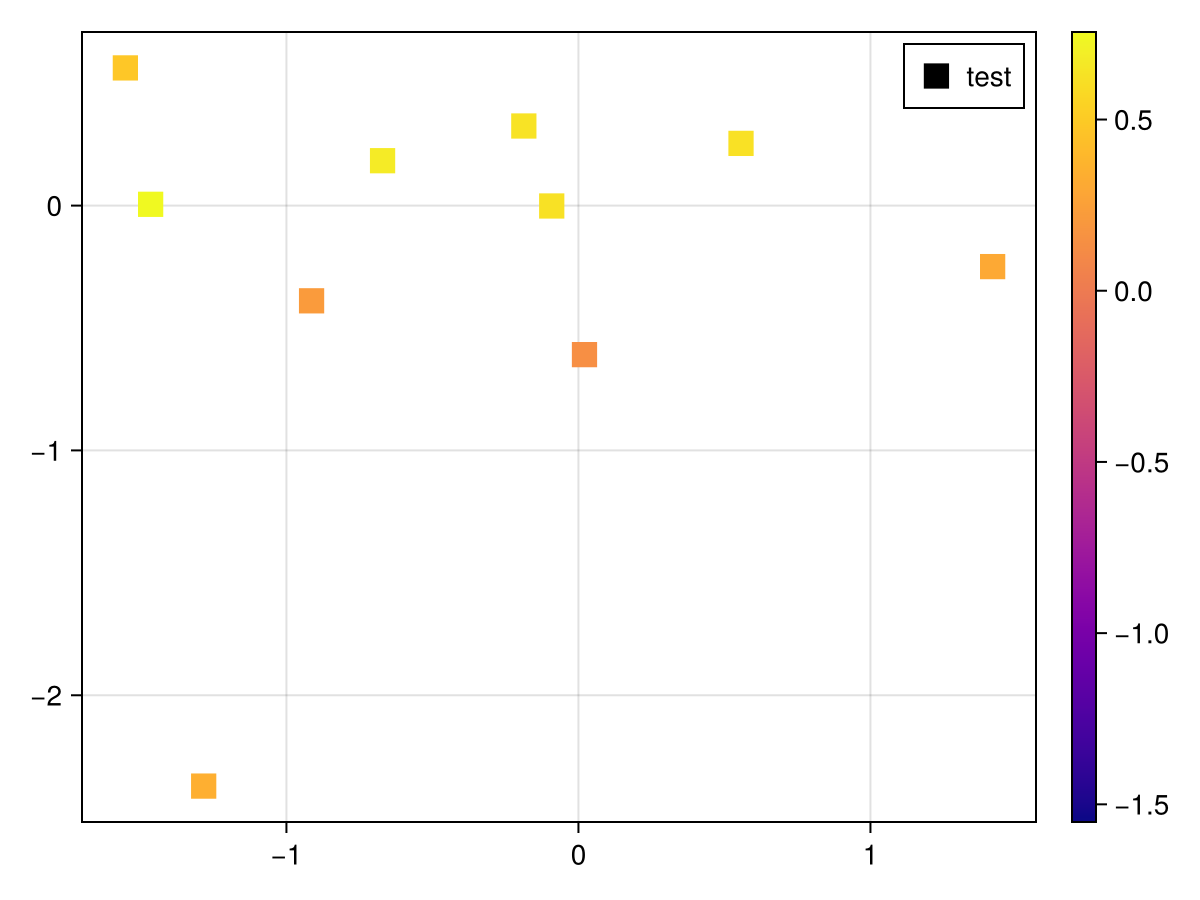

In [6]:
fig, ax, obj = dfplot(df_recipe; label = "test")
axislegend()
Colorbar(fig[1,2], obj)
fig

In [7]:
struct T end

In [8]:
RecipesBase.@recipe function plot(::T, n = 1; customcolor = :green)
  markershape --> :auto        # if markershape is unset, make it :auto
  markercolor :=  customcolor  # force markercolor to be customcolor
  xrotation   --> 45           # if xrotation is unset, make it 45
  zrotation   --> 90           # if zrotation is unset, make it 90
  rand(10,n)                   # return the arguments (input data) for the next recipe
end

LoadError: LoadError: UndefVarError: `RecipesBase` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at /Users/pstaab/code/sci-comp-book/julia-output/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:1

In [9]:
struct SomeMarkers
    x::Vector{Float64}
    y::Vector{Float64}
    size::Vector{Int}
end


In [10]:
Makie.plottype(::SomeMarkers) = Makie.Scatter

In [11]:
function Makie.convert_arguments(S::Type{<:Scatter}, sm::SomeMarkers)
    xy = Makie.convert_arguments(S, sm.x, sm.y)
    # return PlotSpec{Scatter}(xy...; markersize = sm.size)
end


In [12]:

x = rand(100)
y = rand(100)
sizes = rand(1:10, 100)
sm = SomeMarkers(x, y, sizes)



SomeMarkers([0.799523761098743, 0.13348282057171657, 0.6733425522482274, 0.6728309207691745, 0.6676343195643129, 0.04438488752617109, 0.2163325891701917, 0.71674608746409, 0.3881084499652201, 0.4012902514547687  …  0.47214779981733146, 0.817590779589636, 0.06327193207372739, 0.04387572474904822, 0.745442814980955, 0.32359196818633706, 0.04895976066705765, 0.3167394954039924, 0.6204638506305968, 0.14219861583237214], [0.7923041012165616, 0.687535400248453, 0.004623484331517269, 0.5770270109754135, 0.4003704273274815, 0.7802587433836595, 0.8052033165010789, 0.9942079413020138, 0.8575159902207001, 0.747962198251516  …  0.5403636376635433, 0.4450751194894341, 0.46248057435789425, 0.7770300822189208, 0.7673355389466502, 0.9315402253232656, 0.6482898005663457, 0.13888350124604043, 0.8559726489054811, 0.531098260502205], [3, 8, 2, 4, 5, 9, 1, 2, 5, 10  …  8, 3, 9, 6, 8, 4, 2, 5, 6, 8])

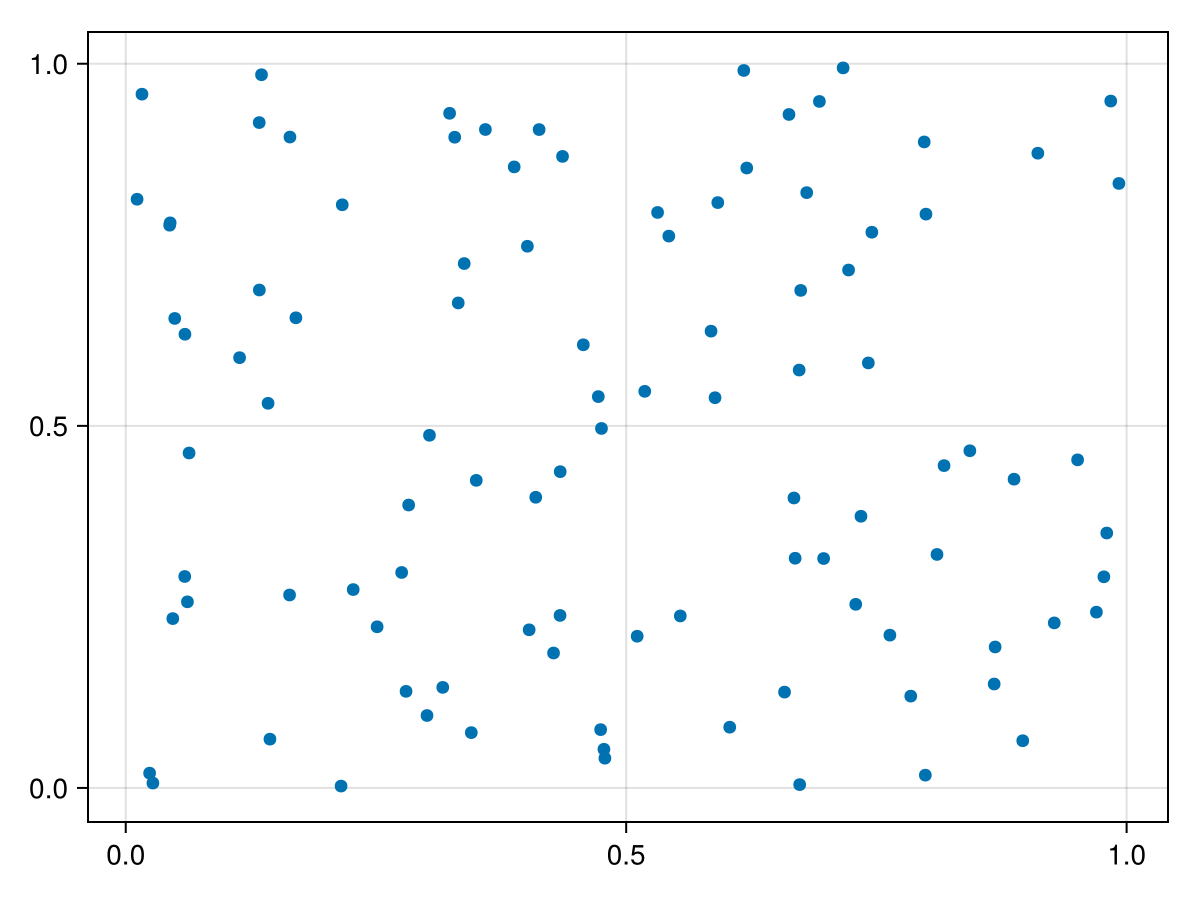

In [13]:
scatter(sm)

In [14]:
struct Polynomial{T <: Number}
  coeffs::Vector{T}
end

In [15]:
Base.show(io::IO, p::Polynomial) = print(io, mapreduce(n -> "$(p.coeffs[n]) x^$(n-1)", (str, term) -> "$str $term", 1:length(p.coeffs)))

In [16]:
eval(poly::Polynomial, x::Number) = reduce((val,c) -> x*val+c, reverse(poly.coeffs))

eval (generic function with 2 methods)

In [17]:
poly1=Polynomial([1,2,3])

1 x^0 2 x^1 3 x^2

In [18]:
Makie.plottype(::Polynomial) = Makie.Lines

In [19]:
Makie.convert_arguments(S::Type{<:Lines}, p::Polynomial, domain = -5..5) = Makie.convert_arguments(S, domain, x->eval(p,x))


In [20]:
function Makie.convert_arguments(S::Type{<:Lines}, domain::IntervalSets.ClosedInterval{T}, p::Polynomial) where T <: Real
  Makie.convert_arguments(S, domain, x->eval(p,x))
end

In [21]:
typeof(-2..2)

ClosedInterval{Int64} (alias for Interval{:closed, :closed, Int64})

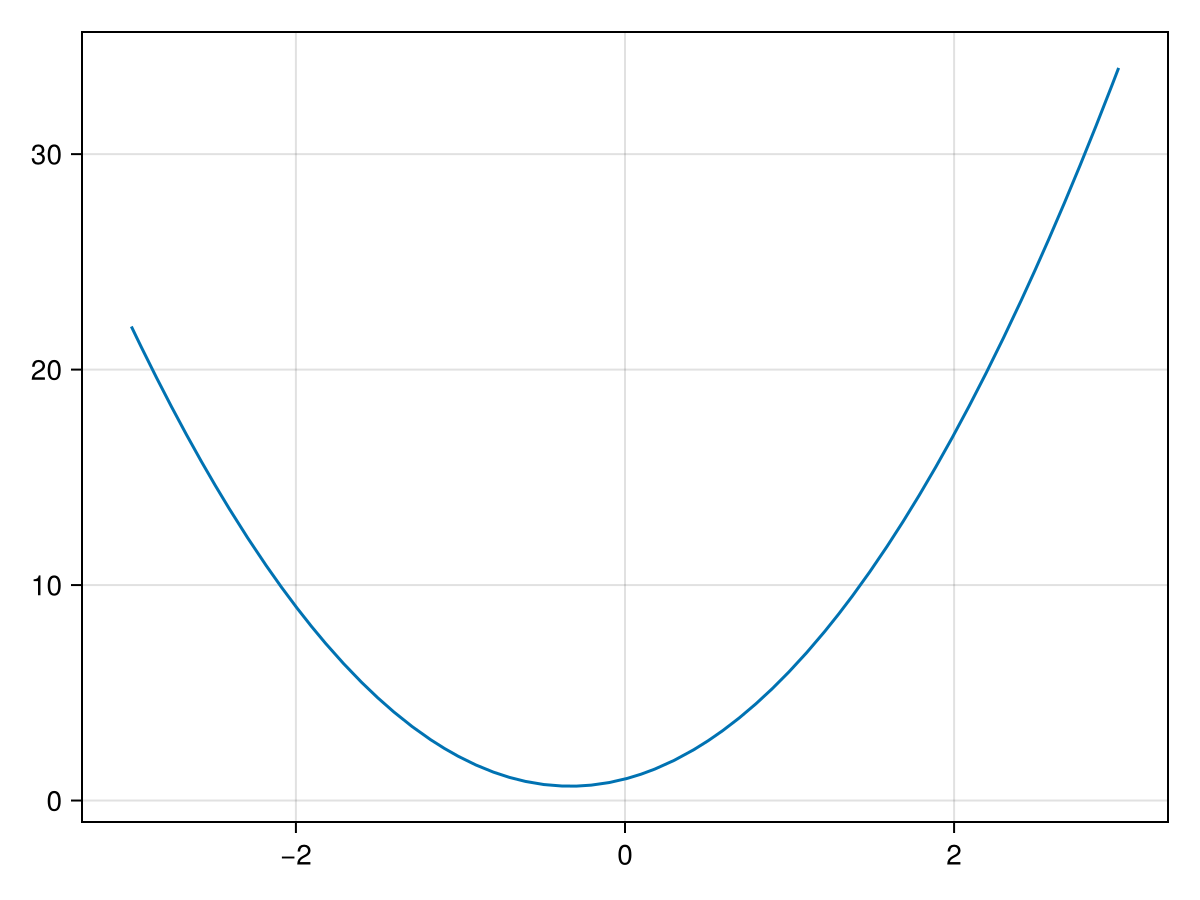

In [22]:
fig = lines(-3..3, poly1)

In [23]:
save("../assets/plots/makie/plot-recipe1.png", fig)

CairoMakie.Screen{IMAGE}


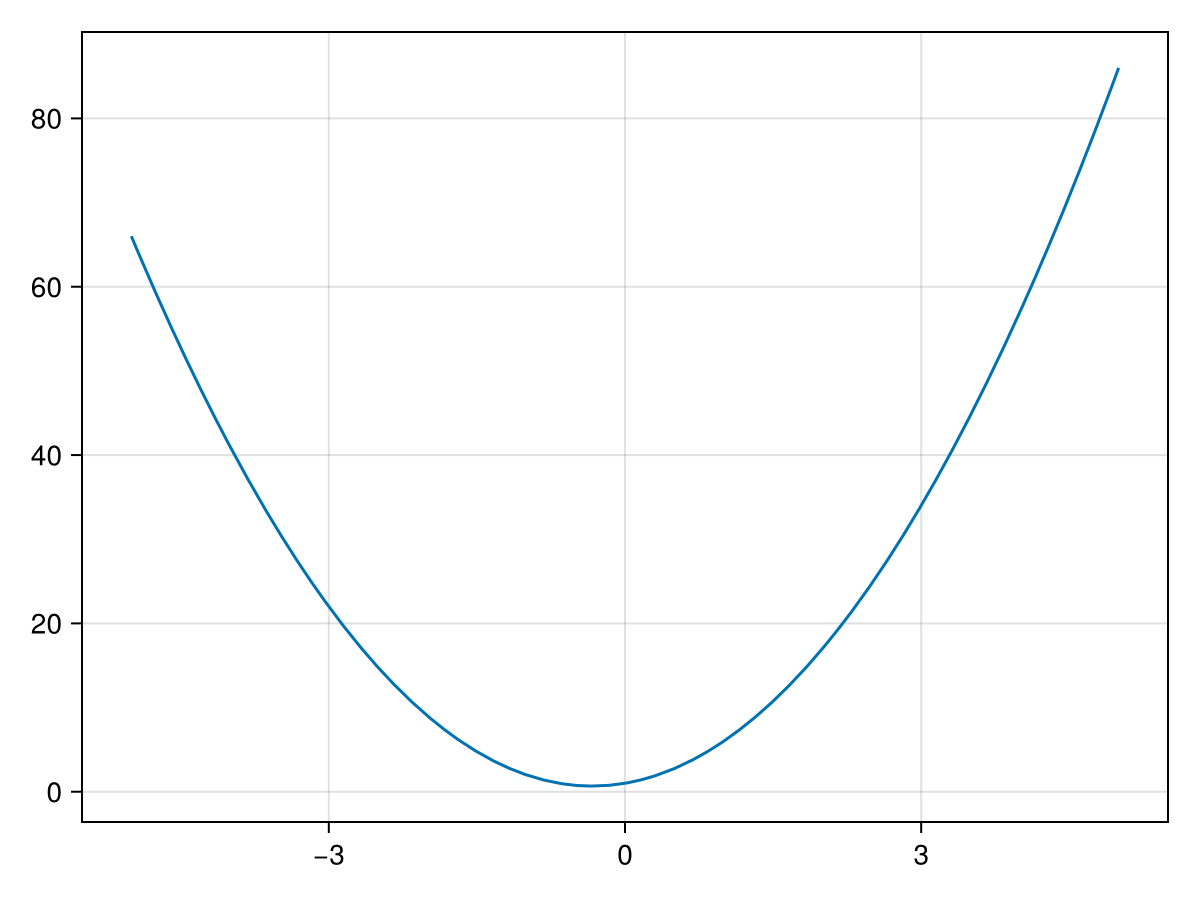

In [24]:
fig = lines(poly1)

In [25]:
save("../assets/plots/makie/plot-recipe2.png", fig)

CairoMakie.Screen{IMAGE}


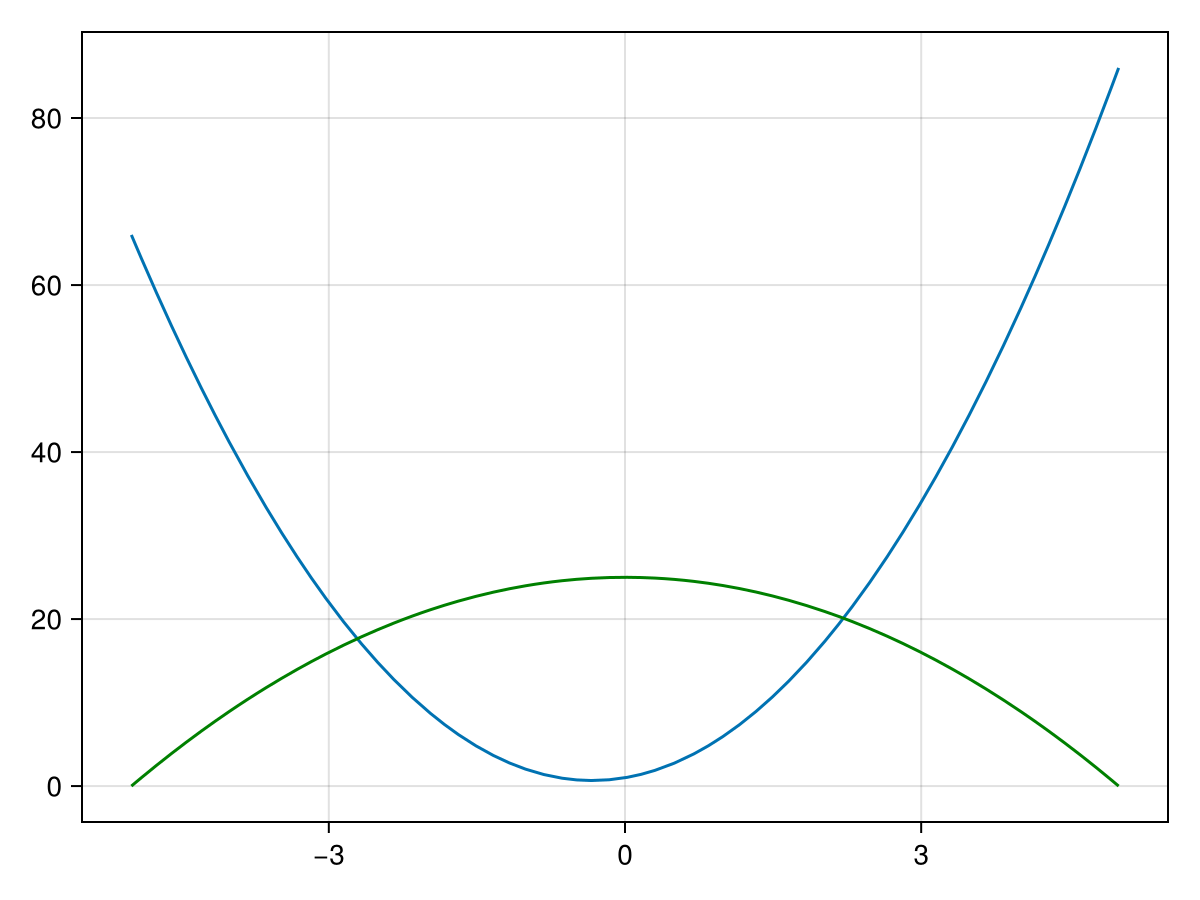

In [29]:
fig, ax = lines(poly1)
lines!(ax, Polynomial([25,0,-1]),color=:green)
fig

In [1]:
struct Triangle{T <: Real}
  pt1::Tuple{T,T}
  pt2::Tuple{T,T}
  pt3::Tuple{T,T}
end

In [10]:
Base.show(io::IO, tri::Triangle) = print(io, "Δ[$(tri.pt1),$(tri.pt2), $(tri.pt3)]")

In [11]:
t = Triangle((0,0),(4,0),(4,3))

Δ[(0, 0),(4, 0), (4, 3)]

In [14]:
Makie.plottype(::Triangle) = Makie.Lines

In [15]:
function Makie.convert_arguments(S::Type{<:Lines}, tri::Triangle)
  xpts = [tri.pt1[1], tri.pt2[1], tri.pt3[1], tri.pt1[1]]
  ypts = [tri.pt1[2], tri.pt2[2], tri.pt3[2], tri.pt1[2]]
  Makie.convert_arguments(S, xpts, ypts)
end


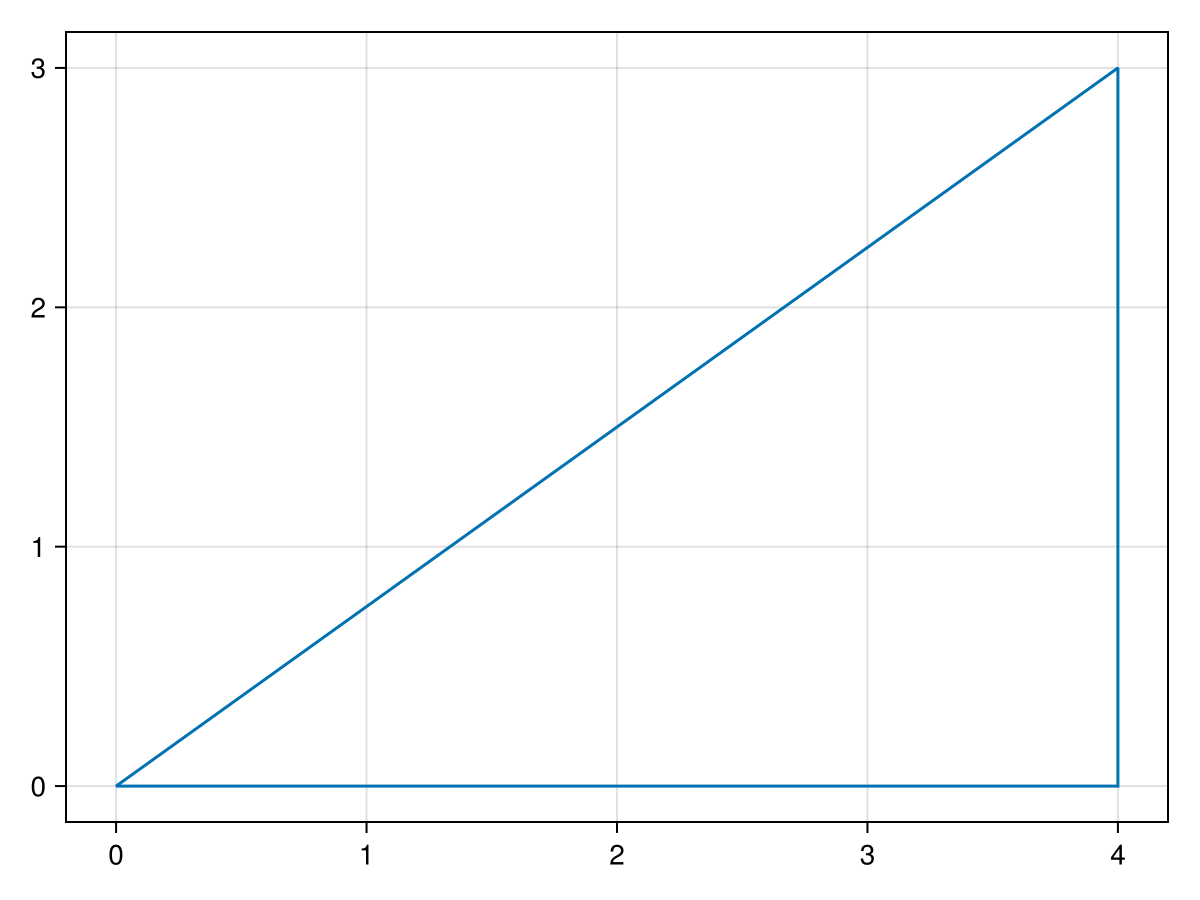

In [17]:
lines(t)